# Intro

Country_data.csv contains data about REITS of several countries. What countries have had comparible performance? To answer this question we will cluster these different countries.

# Analysis

First, we'll read in the data, format it and express it as a percentage change.

In [14]:
import pandas as pd

df = pd.read_csv('datasets/country_data.csv')
df['Period'] = pd.to_datetime(df['Unnamed: 0'])
df.set_index(df['Period'], inplace=True)
df.drop(['Unnamed: 0', 'Period'], axis=1, inplace=True)
df = df.pct_change().dropna().T

print(df.head())

Period       1998-06-30  1998-09-30  1998-12-31  1999-03-31  1999-06-30  \
Switzerland   -0.002848   -0.003455   -0.009057    0.008783    0.000354   
Colombia       0.033961   -0.011137   -0.013721   -0.003072   -0.002389   
Denmark        0.041667    0.014003    0.015777    0.015536    0.015294   
Hong Kong     -0.188897   -0.124444    0.061929   -0.027725    0.005900   
Italy          0.010818    0.002020    0.000272   -0.002116    0.006418   

Period       1999-09-30  1999-12-31  2000-03-31  2000-06-30  2000-09-30  ...  \
Switzerland   -0.003432    0.002414   -0.006587    0.016364    0.007226  ...   
Colombia      -0.021642    0.016699    0.020745    0.027686   -0.031380  ...   
Denmark        0.018833    0.001848    0.014762    0.027273    0.023007  ...   
Hong Kong     -0.050831   -0.014418   -0.004180   -0.097587    0.025581  ...   
Italy          0.004911    0.005609    0.014212    0.008485    0.013674  ...   

Period       2017-09-30  2017-12-31  2018-03-31  2018-06-30  2018-09

To make sure the means are 0 and the variance identical we scale the data. As there are 87 features we will need to reduce the data to avoid the 'curse of dimensionality' through Principal Component Analysis. Let's first investigate to how many dimensions we can reduce the data without losing too much information.

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit_transform(df)
ss = pd.DataFrame(ss, index=df.index, columns=df.columns)

In [16]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(ss)
pca_var = pca.explained_variance_

for i in range(len(pca_var)):
    print('%s\t%.2f%%' % (i+1, 100*pca_var[0:i+1].sum()/pca_var.sum()))

1	29.15%
2	43.88%
3	57.76%
4	68.68%
5	76.10%
6	81.68%
7	86.76%
8	91.22%
9	94.59%
10	96.53%
11	98.02%
12	99.29%
13	100.00%
14	100.00%


<BarContainer object of 14 artists>

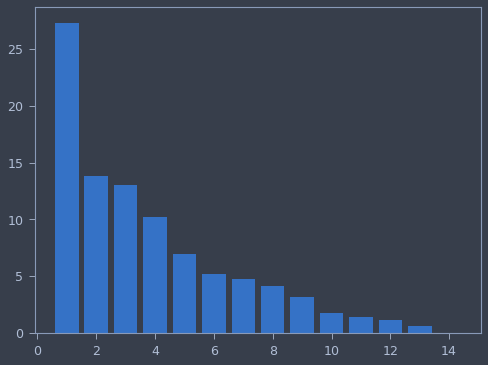

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.bar(range(1, len(pca_var)+1), pca_var)

As we see from the data above, over 80% of the variance can be explained by reducing the number of components to 6. Let's do that now and draw a dendrogram to try and cluster the countries into three main groups.

In [1]:
red = PCA(n_components=6).fit_transform(ss)

NameError: name 'PCA' is not defined

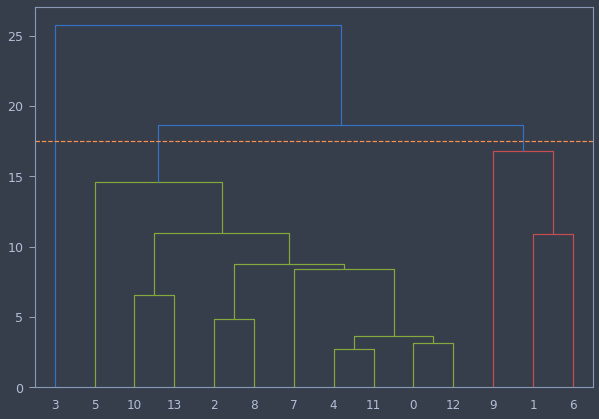

In [19]:
import scipy.cluster.hierarchy as shc 

plt.figure(figsize=(10,7))
dend = shc.dendrogram(shc.linkage(red, method='ward'))
plt.axhline(y=17.5, color='y', linestyle='--')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
ward.fit(red)
ss['cluster'] = ward.labels_
ss['cluster']

Switzerland    2
Colombia       0
Denmark        2
Hong Kong      1
Italy          2
Netherlands    2
Norway         0
New Zealand    2
Sweden         2
Singapore      0
US             2
Canada         2
South Korea    2
Portugal       2
Name: cluster, dtype: int64

# Conclusion

As we can see most major economies are grouped together. Interestingly Norway is classified differently Denmark and other European countries and seems to be more similar to Singapore and Colombia. Hong Kong on the other hand is an entire category on its own. It would be interesting to further investigate why that is.